In [1]:
import json
import sys
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/Users/tianyuyang/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
def read_data():
    
    with open('instances.jsonl','r') as f:
        instances = []
        for line in f:
        
            instances.append(json.loads(line))
    with open('truth.jsonl', 'r') as f:
        labels = []
        for line in f:
            labels.append(json.loads(line))
    df = pd.DataFrame(instances)
    df = df.set_index('id')
    labels = pd.DataFrame(labels)
    labels = labels.set_index('id')
    df['label']  = 0
    df['label'][labels['truthClass'] == 'clickbait'] = 1
    df['truthJudgments'] = labels.truthJudgments
    df['postText'] = df['postText'].apply(lambda x: x[0])
    return df

In [3]:
df  = read_data()

/Users/tianyuyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
df.head()

,postMedia,postText,postTimestamp,targetCaptions,targetDescription,targetKeywords,targetParagraphs,targetTitle,label,truthJudgments
id,,,,,,,,,,
858462320779026433,[],UK’s response to modern slavery leaving victim...,Sat Apr 29 23:25:41 +0000 2017,[modern-slavery-rex.jpg],“Inexcusable” failures in the UK’s system for ...,"modern slavery, Department For Work And Pensio...",[Thousands of modern slavery victims have not ...,‘Inexcusable’ failures in UK’s response to mod...,0,"[0.3333333333, 0.0, 0.3333333333, 0.0, 0.0]"
858421020331560960,[],this is good,Sat Apr 29 20:41:34 +0000 2017,"[In this July 1, 2010 file photo, Dr. Charmain...",President Donald Trump has appointed pro-life ...,"Americans United for Life, Dr. Charmaine Yoest...",[President Donald Trump has appointed the pro-...,Donald Trump Appoints Pro-Life Advocate as Ass...,1,"[1.0, 1.0, 1.0, 1.0, 1.0]"
858368123753435136,[],"The ""forgotten"" Trump roast: Relive his brutal...",Sat Apr 29 17:11:23 +0000 2017,[President Trump will not attend this year's W...,President Trump won't be at this year's White ...,"trump whcd, whcd, white house correspondents d...",[When the White House correspondents’ dinner i...,The ‘forgotten’ Trump roast: Relive his brutal...,0,"[0.3333333333, 1.0, 0.3333333333, 0.0, 0.66666..."
858323428260139008,[],Meet the happiest #dog in the world!,Sat Apr 29 14:13:46 +0000 2017,"[Maru , Maru, Maru, Maru, Maru]","The article is about Maru, a husky dog who has...","Maru, husky, dogs, pandas, furball, instagram",[Adorable is probably an understatement. This ...,"Meet The Happiest Dog In The World, Maru The H...",1,"[1.0, 0.6666666666, 1.0, 1.0, 1.0]"
858283602626347008,[],Tokyo's subway is shut down amid fears over an...,Sat Apr 29 11:35:31 +0000 2017,[All nine lines of Tokyo's subway system were ...,"The temporary suspension, which lasted ten min...","Tokyo,subway,shut,fears,North,Korean,attack",[One of Tokyo's major subways systems says it ...,Tokyo's subway is shut down amid fears over an...,0,"[0.0, 0.0, 0.0, 0.0, 0.0]"


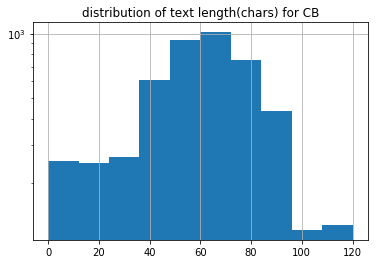

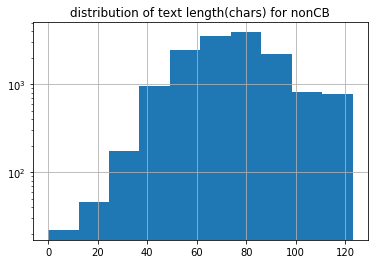

average text length(chars) for CB:  59.246607294317215
average text length(chars) for nonCB:  74.66542524377031
-------------------------------------------------------


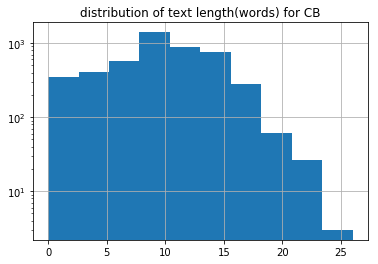

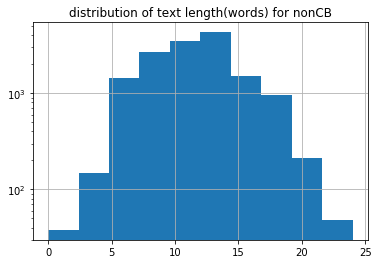

average text length(words) for CB:  9.780617678381256
average text length(words) for nonCB:  11.508195610945544
-------------------------------------------------------
# empty texts in CB:  45
# empty texts in nonCB:  9


In [5]:
# analyze length
def ana_length(df):
    #length by character
    cblens = df['postText'][df['label']==1].apply(len)
    noncblens =  df['postText'][df['label']==0].apply(len)
    
    plt.figure()
    cblens.hist()
    plt.title('distribution of text length(chars) for CB')
    plt.yscale('log')
    plt.show()
    
    plt.figure()
    noncblens.hist()
    plt.yscale('log')
    plt.title('distribution of text length(chars) for nonCB')
    plt.show()
    print('average text length(chars) for CB: ',cblens[cblens>0].mean())
    print('average text length(chars) for nonCB: ', noncblens[noncblens>0].mean())
    print('-------------------------------------------------------')
    
    #length by word
    tokenizer = nltk.tokenize.TweetTokenizer()
    cblens = df['postText'][df['label']==1].apply(lambda x: len([i for i in tokenizer.tokenize(x) if i.isalnum()]))
    noncblens = df['postText'][df['label']==0].apply(lambda x:len([ i for i in tokenizer.tokenize(x) if i.isalnum()]))
    
    plt.figure()
    cblens.hist()
    plt.title('distribution of text length(words) for CB')
    plt.yscale('log')
    plt.show()
    
    plt.figure()
    noncblens.hist()
    plt.yscale('log')
    plt.title('distribution of text length(words) for nonCB')
    plt.show()
    print('average text length(words) for CB: ', cblens[cblens>0].mean())
    print('average text length(words) for nonCB: ', noncblens[noncblens>0].mean())
    print('-------------------------------------------------------')
    
    #show distribution of empty text
    count_cb = df['postText'][df['label']==1].apply(lambda x: len(x)==0).sum()
    count_noncb = df['postText'][df['label']==0].apply(lambda x: len(x)==0).sum()
    print('# empty texts in CB: ', count_cb)
    print("# empty texts in nonCB: ", count_noncb)
    
    
    
ana_length(df)

/Users/tianyuyang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


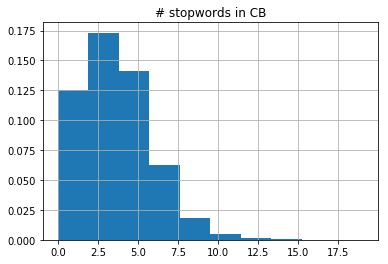

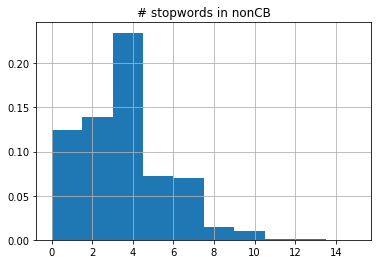

Average # of stop words in CB 3.305187985717286
Average # of stop words in non CB 3.3241523989984434
---------------------------------------------


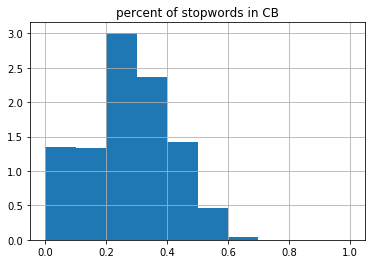

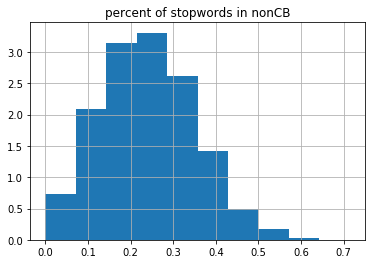

Average percent of stop words in CB 0.26725364384298317
Average percent of stop words in non CB 0.23399283976772162
---------------------------------------------


In [6]:
# distributions of stop words
def ana_stopwords(df):
    tokenizer = nltk.tokenize.TweetTokenizer()
    sws = set(nltk.corpus.stopwords.words('english'))
    def count_sw(string):
        c = 0
        
        for i in tokenizer.tokenize(string):
            if i in sws:
                c+=1
        return c
    swcb = df['postText'][df['label'] ==1].apply(count_sw)
    swnoncb = df['postText'][df['label']==0].apply(count_sw)
    
    plt.figure()
    swcb.hist(normed = True)
    plt.title('# stopwords in CB')
    plt.show()
    plt.figure()
    swnoncb.hist(normed = True)
    plt.title('# stopwords in nonCB')
    plt.show()

    print('Average # of stop words in CB', swcb.mean())
    print('Average # of stop words in non CB', swnoncb.mean())
    print('---------------------------------------------')
    def count_swp(string):
        c = 0
        tokens = tokenizer.tokenize(string)
        for i in tokens:
            if i in sws:
                c+=1
        return c/len(tokens)
    
    count_cb = df['postText'][df['label']==1].apply(lambda x: len(x)==0)
    count_noncb = df['postText'][df['label']==0].apply(lambda x: len(x)==0)
    swcb = df['postText'][df['label'] ==1][count_cb ==0].apply(count_swp)
    swnoncb = df['postText'][df['label']==0][count_noncb==0].apply(count_swp)
    
    plt.figure()
    swcb.hist(normed = True)
    plt.title('percent of stopwords in CB')
    plt.show()
    plt.figure()
    swnoncb.hist(normed = True)
    plt.title('percent of stopwords in nonCB')
    plt.show()
    print('Average percent of stop words in CB', swcb.mean())
    print('Average percent of stop words in non CB', swnoncb.mean())
    print('---------------------------------------------')

ana_stopwords(df)

/Users/tianyuyang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


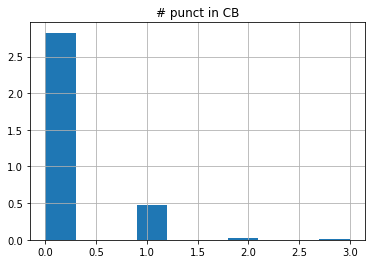

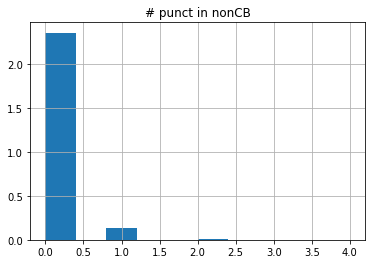

Average # of puncts in CB 0.16463414634146342
Average # of puncts in non CB 0.062394261352101237


In [7]:
# use of punctuations
## with only ?!
def ana_punct(df):
    def count_puncts(string):
        return len(re.findall(r'[?!]',string))
    
    cb = df['postText'][df['label'] ==1].apply(count_puncts)
    noncb = df['postText'][df['label']==0].apply(count_puncts)
    
    plt.figure()
    cb[cb<=3].hist(normed = True)
    plt.title('# punct in CB')
    plt.show()
    
    plt.figure()
    noncb.hist(normed = True)
    plt.title('# punct in nonCB')
    plt.show()
    print('Average # of puncts in CB', cb[cb<=3].mean())
    print('Average # of puncts in non CB', noncb.mean())
    
ana_punct(df)

proportion of CB that has at least one hashtag 0.08821676118462508
proportion of nonCB that has at least one hashtag 0.111253975773161
----------------------------------------------


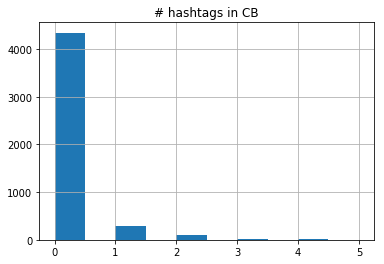

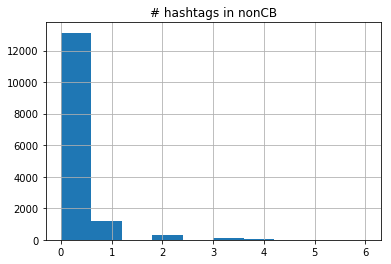

average hashtags in CB 0.12770426381012392
average hashtags in nonCB 0.15889558097042703


In [8]:
#check distribution of hash tag
#### no obvious diff, try on more granuler level later
def ana_hashtag(df):
    def find_hashtags(string):
    
        return len(re.findall(r'#\w+', string))

    # find counts of hash tags
    cb = df['postText'][df['label'] ==1].apply(find_hashtags)
    noncb = df['postText'][df['label']==0].apply(find_hashtags)

    # distribution of existence
    print('proportion of CB that has at least one hashtag', (cb>0).sum()/len(cb))
    print('proportion of nonCB that has at least one hashtag', (noncb>0).sum()/len(noncb))
    print('----------------------------------------------')
    

    # distribution of the amount of hashtags
    plt.figure()
    cb.hist()
    plt.title('# hashtags in CB')
    plt.show()
    
    plt.figure()
    noncb.hist()
    plt.title('# hashtags in nonCB')
    plt.show()
    print('average hashtags in CB', cb.mean())
    print('average hashtags in nonCB', noncb.mean())
ana_hashtag(df)

Average sentiment in CB 0.09068424584052835
Average sentiment in non CB 0.04882985075805805


/Users/tianyuyang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


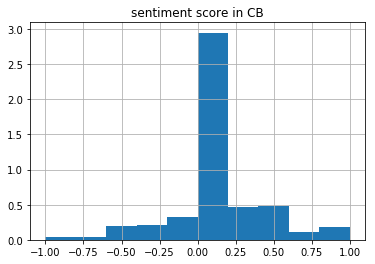

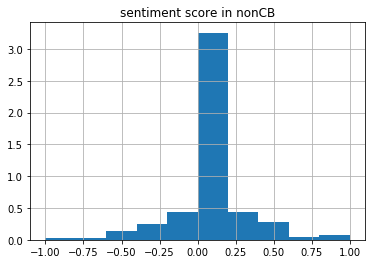

In [9]:
## sentiment and subjectivity
def ana_sent(df):
    tokenizer = nltk.tokenize.TweetTokenizer()
    def get_sent_score(string):
        #string  = re.sub(r'#\w+','<hashtag>',string)
        #string = re.sub(r'@\w+', '<usertag>',string)
        
        return TextBlob(string).sentiment[0]
    cb = df['postText'][df['label'] ==1].apply(get_sent_score)
    noncb = df['postText'][df['label']==0].apply(get_sent_score)
    
    plt.figure()
    cb.hist(normed = True)
    plt.title('sentiment score in CB')

    
    plt.figure()
    noncb.hist(normed = True)
    plt.title('sentiment score in nonCB')

    print('Average sentiment in CB', cb.mean())
    print('Average sentiment in non CB', noncb.mean())
ana_sent(df)
        

Average subjectivity in CB 0.32158338491461813
Average subjectivity in non CB 0.26471219617807296


/Users/tianyuyang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


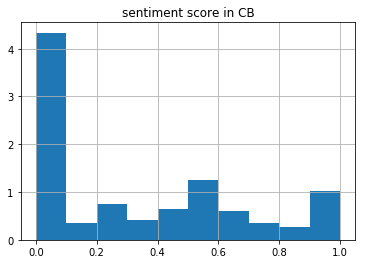

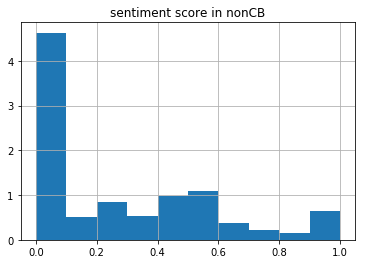

In [10]:
## sentiment and subjectivity
def ana_subj(df):
    tokenizer = nltk.tokenize.TweetTokenizer()
    def get_sent_score(string):
        #string  = re.sub(r'#','',string)
        #string = re.sub(r'@', '',string)
        
        return TextBlob(string).sentiment[1]
    cb = df['postText'][df['label'] ==1].apply(get_sent_score)
    noncb = df['postText'][df['label']==0].apply(get_sent_score)
    
    plt.figure()
    cb.hist(normed = True)
    plt.title('sentiment score in CB')

    
    plt.figure()
    noncb.hist(normed = True)
    plt.title('sentiment score in nonCB')

    print('Average subjectivity in CB', cb.mean())
    print('Average subjectivity in non CB', noncb.mean())
ana_subj(df)
        

In [11]:
# sentiment 
# superlative adjective
def ana_sup(df):
    def count_sup(string):
        for i in nltk.pos_tag(nltk.word_tokenize(string.lower())):
            if i[1] == 'JJS':return 1
        return 0
    cb = df['postText'][df['label'] ==1].apply(count_sup)
    noncb = df['postText'][df['label']==0].apply(count_sup)
    print('proportion of titles contains superlative adjective')
    print('For CB: ', cb.mean())
    print('Non CB: ', noncb.mean())
ana_sup(df)

proportion of titles contains superlative adjective
For CB:  0.07372400756143667
Non CB:  0.04642349597347229


In [12]:
# starting with number
# drop prior stop words
# count adjectives 
def ana_start(df):
    sws = set(nltk.corpus.stopwords.words('english'))
    numbers = {'one', 'two', 'three', 'four', 'five', 'six', 'nine','ten'}
    def swithnum(string):
        # the first nonstopword
        tokens = nltk.word_tokenize(string)
        
        fw = None
        for i,t in zip(tokens, nltk.pos_tag(tokens)):
            if i.lower() not in sws and not t[1].startswith('JJ'):
                fw = i
                break
        if fw and (fw.isnumeric() or fw.lower() in numbers):
            return 1
        else:        return 0
    cb = df['postText'][df['label'] ==1].apply(swithnum)
    noncb = df['postText'][df['label']==0].apply(swithnum)
    print('proportion of posts that start with number')
    print('Proportion For CB: ', cb.mean())
    print('Proportion for Non CB: ', noncb.mean())
    print('total for CB', cb.sum(), ' out of ', len(cb))
    print('total for nonCB', noncb.sum(), ' out of ', len(noncb))
ana_start(df)

proportion of posts that start with number
Proportion For CB:  0.13925645872715817
Proportion for Non CB:  0.03173851255329228
total for CB 663  out of  4761
total for nonCB 469  out of  14777
